### Kmeans

In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import scipy.cluster.hierarchy as sch

In [111]:
data=pd.read_csv('crime_data.csv')
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [121]:
data.rename({'Unnamed: 0':'States'}, axis=1, inplace=True)
data.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [122]:
data.shape

(50, 5)

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [124]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [125]:
data.isnull().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [126]:
data.duplicated().any()

False

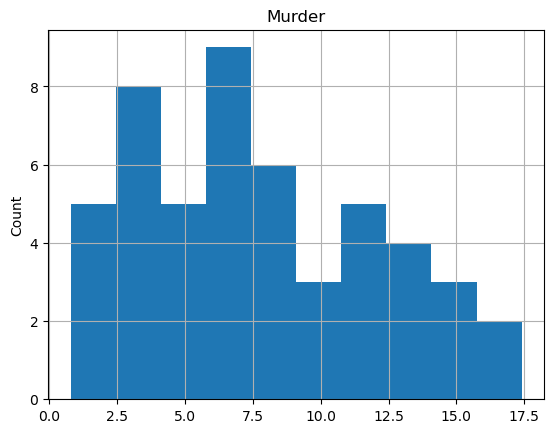

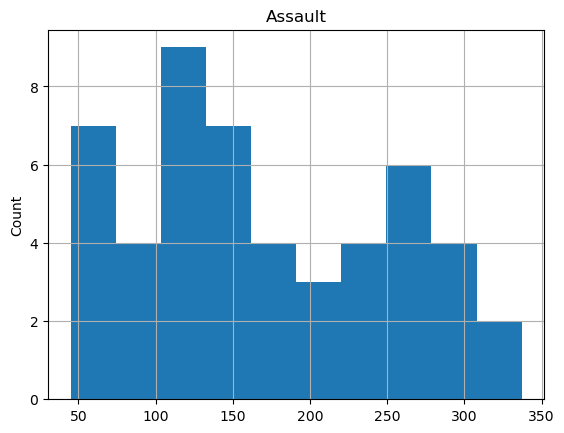

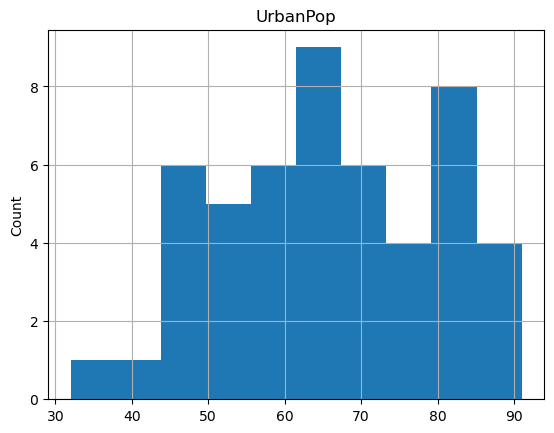

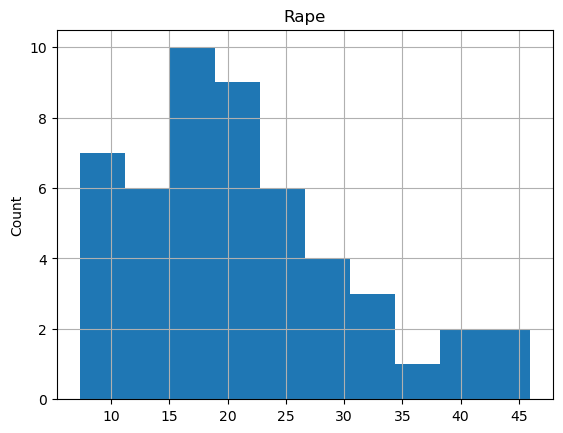

In [128]:
continuous_feature = [feature for feature in data.columns if data[feature].dtype!='O']
for feature in continuous_feature:
    crime_data1 = data.copy()
    crime_data1[feature].hist(bins=10)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Murder


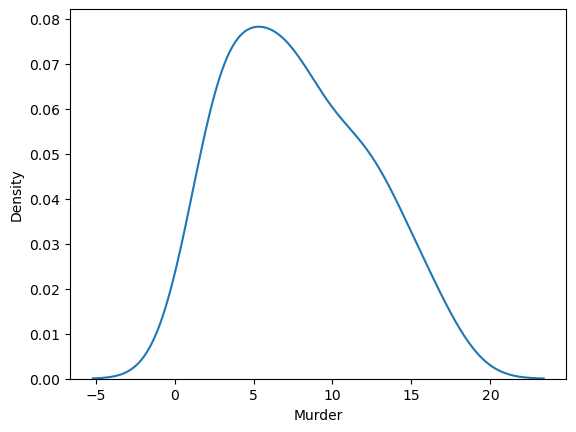

Assault


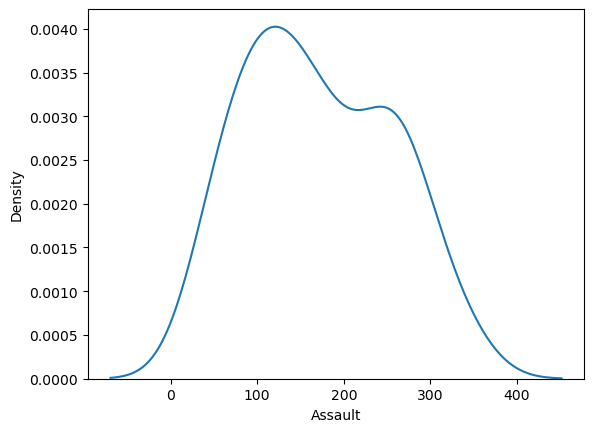

UrbanPop


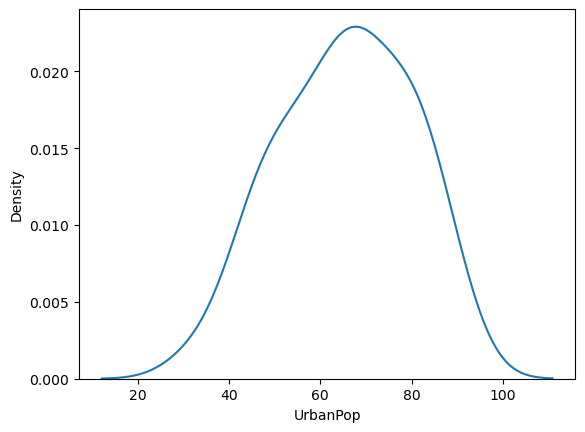

Rape


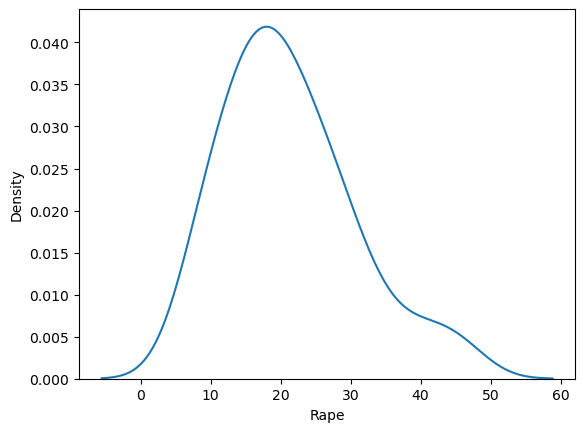

In [130]:
for n in continuous_feature:
    print(n)
    sns.kdeplot(data[n])
    plt.show()

In [131]:
data.columns

Index(['States', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [140]:
crime_df = data.set_index('States')
crime_df.head()

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [142]:
standard_scaler = StandardScaler()

In [145]:
std_crime = standard_scaler.fit_transform(crime_df)
std_crime

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [146]:
std_crime.shape

(50, 4)

In [147]:
minmax = MinMaxScaler()

In [148]:
norm_crime = minmax.fit_transform(crime_df)

In [149]:
norm_crime.shape

(50, 4)

In [174]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_crime)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"Num_Clusters":cluster_range,"Cluster_Errors":cluster_errors})
clusters_df

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Wi

,Num_Clusters,Cluster_Errors
0,1,200.000000
1,2,104.961633
2,3,79.955482
3,4,57.554259
4,5,50.688170
5,6,45.433704
6,7,39.908375
7,8,35.117482
8,9,30.758279
9,10,30.079817


In [175]:
clust_list = [2,3,4,5,6,7,8,9]


In [ ]:
for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(std_crime)
    sil_score1= silhouette_score(std_crime, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

In [214]:
model_kmeans = KMeans(n_clusters=5)

In [215]:
y_predict_kmeans = model_kmeans.fit_predict(std_crime)
y_predict_kmeans.shape

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


(50,)

In [216]:
y_predict_kmeans

array([4, 4, 1, 0, 1, 1, 2, 2, 1, 4, 2, 3, 1, 0, 3, 0, 0, 4, 3, 1, 2, 1,
       3, 4, 1, 0, 0, 1, 3, 2, 1, 1, 4, 3, 2, 0, 0, 2, 2, 4, 3, 4, 1, 2,
       3, 0, 2, 3, 3, 0])

In [217]:
model_kmeans.labels_

array([4, 4, 1, 0, 1, 1, 2, 2, 1, 4, 2, 3, 1, 0, 3, 0, 0, 4, 3, 1, 2, 1,
       3, 4, 1, 0, 0, 1, 3, 2, 1, 1, 4, 3, 2, 0, 0, 2, 2, 4, 3, 4, 1, 2,
       3, 0, 2, 3, 3, 0])

In [218]:
model_kmeans.cluster_centers_

array([[-0.2105881 , -0.41527235, -0.34474854, -0.20512826],
       [ 0.71788585,  1.04432228,  0.89281033,  1.18827715],
       [-0.63501124, -0.41284811,  0.96027124, -0.39278502],
       [-1.18467401, -1.2201201 , -1.01470522, -1.11321445],
       [ 1.4610129 ,  0.99381728, -0.84023734,  0.35649393]])

In [219]:
model_kmeans.inertia_

50.688170214356234

In [220]:
crime_df['Kmeans_Label'] = model_kmeans.labels_

In [221]:
crime_df.groupby('Kmeans_Label').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Kmeans_Label,,,,
0,6.880000,136.500000,60.600000,19.3300
1,10.883333,256.916667,78.333333,32.2500
2,5.050000,136.700000,79.300000,17.5900
3,2.680000,70.100000,51.000000,10.9100
4,14.087500,252.750000,53.500000,24.5375


In [222]:
crime_df[crime_df['Kmeans_Label']==0]

,Murder,Assault,UrbanPop,Rape,Kmeans_Label
States,,,,,
Arkansas,8.8,190,50,19.5,0
Indiana,7.2,113,65,21.0,0
Kansas,6.0,115,66,18.0,0
Kentucky,9.7,109,52,16.3,0
Montana,6.0,109,53,16.4,0
Nebraska,4.3,102,62,16.5,0
Oklahoma,6.6,151,68,20.0,0
Oregon,4.9,159,67,29.3,0
Virginia,8.5,156,63,20.7,0


In [223]:
crime_df[crime_df['Kmeans_Label']==2]

,Murder,Assault,UrbanPop,Rape,Kmeans_Label
States,,,,,
Connecticut,3.3,110,77,11.1,2
Delaware,5.9,238,72,15.8,2
Hawaii,5.3,46,83,20.2,2
Massachusetts,4.4,149,85,16.3,2
New Jersey,7.4,159,89,18.8,2
Ohio,7.3,120,75,21.4,2
Pennsylvania,6.3,106,72,14.9,2
Rhode Island,3.4,174,87,8.3,2
Utah,3.2,120,80,22.9,2


In [224]:
crime_df[crime_df['Kmeans_Label']==1]

,Murder,Assault,UrbanPop,Rape,Kmeans_Label
States,,,,,
Arizona,8.1,294,80,31.0,1
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,1
Florida,15.4,335,80,31.9,1
Illinois,10.4,249,83,24.0,1
Maryland,11.3,300,67,27.8,1
Michigan,12.1,255,74,35.1,1
Missouri,9.0,178,70,28.2,1
Nevada,12.2,252,81,46.0,1


In [225]:
crime_df[crime_df['Kmeans_Label']==3]

,Murder,Assault,UrbanPop,Rape,Kmeans_Label
States,,,,,
Idaho,2.6,120,54,14.2,3
Iowa,2.2,56,57,11.3,3
Maine,2.1,83,51,7.8,3
Minnesota,2.7,72,66,14.9,3
New Hampshire,2.1,57,56,9.5,3
North Dakota,0.8,45,44,7.3,3
South Dakota,3.8,86,45,12.8,3
Vermont,2.2,48,32,11.2,3
West Virginia,5.7,81,39,9.3,3


In [226]:
crime_df[crime_df['Kmeans_Label']==4]

,Murder,Assault,UrbanPop,Rape,Kmeans_Label
States,,,,,
Alabama,13.2,236,58,21.2,4
Alaska,10.0,263,48,44.5,4
Georgia,17.4,211,60,25.8,4
Louisiana,15.4,249,66,22.2,4
Mississippi,16.1,259,44,17.1,4
North Carolina,13.0,337,45,16.1,4
South Carolina,14.4,279,48,22.5,4
Tennessee,13.2,188,59,26.9,4


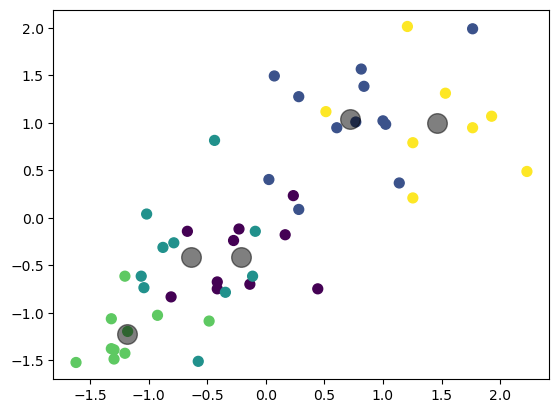

In [228]:
plt.scatter(std_crime[:,0], std_crime[:,1], c = model_kmeans.labels_, s = 50, cmap = "viridis")
centers = model_kmeans.cluster_centers_                                 
plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha = 0.5)
plt.show()

In [229]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(norm_crime)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Wi

,num_clusters,cluster_errors
0,1,13.184123
1,2,6.596894
2,3,5.018500
3,4,3.683456
4,5,3.210029
5,6,2.890161
6,7,2.610808
7,8,2.370623
8,9,2.071603
9,10,1.854546


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Wi

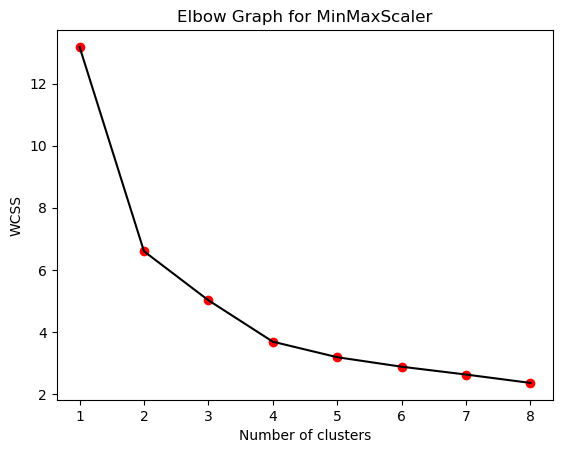

In [231]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(norm_crime)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [232]:
model = KMeans(random_state=10, max_iter=500, init='k-means++')

In [233]:
clust_list = [2,3,4,5,6,7,8,9]

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(norm_crime)
    sil_score1= silhouette_score(norm_crime, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.42364457559625074


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.3187755079997931


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.34089035600743633


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.3062742525752849


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.27035587392051724


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.2371119747926814


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.24422345369104229


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 9 The average silhouette_score is : 0.23181794623773663


In [234]:
model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')

In [235]:
y_predict_kmeans = model_kmeans.fit_predict(norm_crime)
y_predict_kmeans.shape

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


(50,)

In [236]:
y_predict_kmeans

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [237]:
model_kmeans.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [238]:
model_kmeans.cluster_centers_

array([[0.24518072, 0.23778539, 0.53615819, 0.22334195],
       [0.68463855, 0.72003425, 0.61694915, 0.56498708]])

In [239]:
model_kmeans.inertia_

6.596893867946196

In [241]:
crime_df['Kmeans_Label'] = model_kmeans.labels_

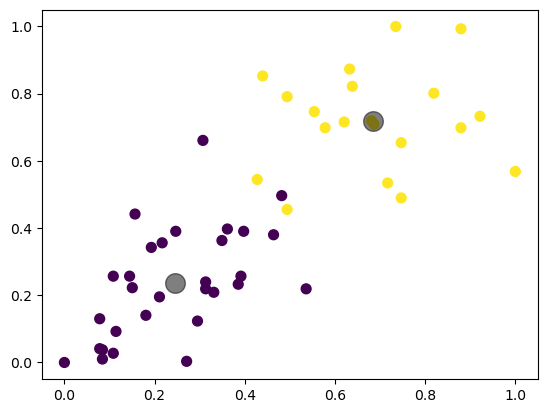

In [242]:
plt.scatter(norm_crime[:,0], norm_crime[:,1], c = model_kmeans.labels_, s = 50, cmap = "viridis")
centers = model_kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha = 0.5)
plt.show()

In [243]:
crime_df.groupby('Kmeans_Label').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Kmeans_Label,,,,
0,4.870,114.433333,63.633333,15.943333
1,12.165,255.250000,68.400000,29.165000


### Hierarchical Clustering

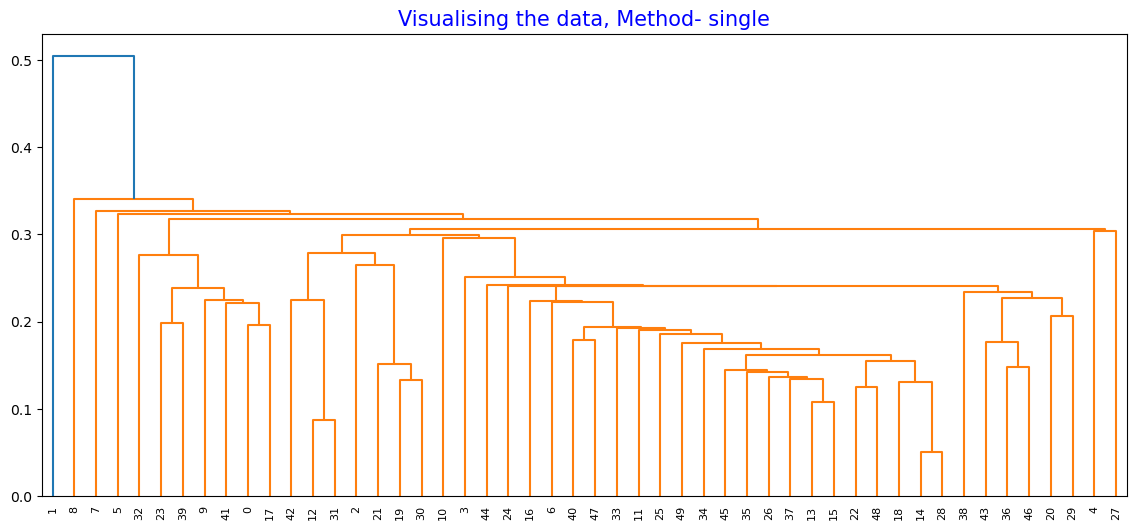

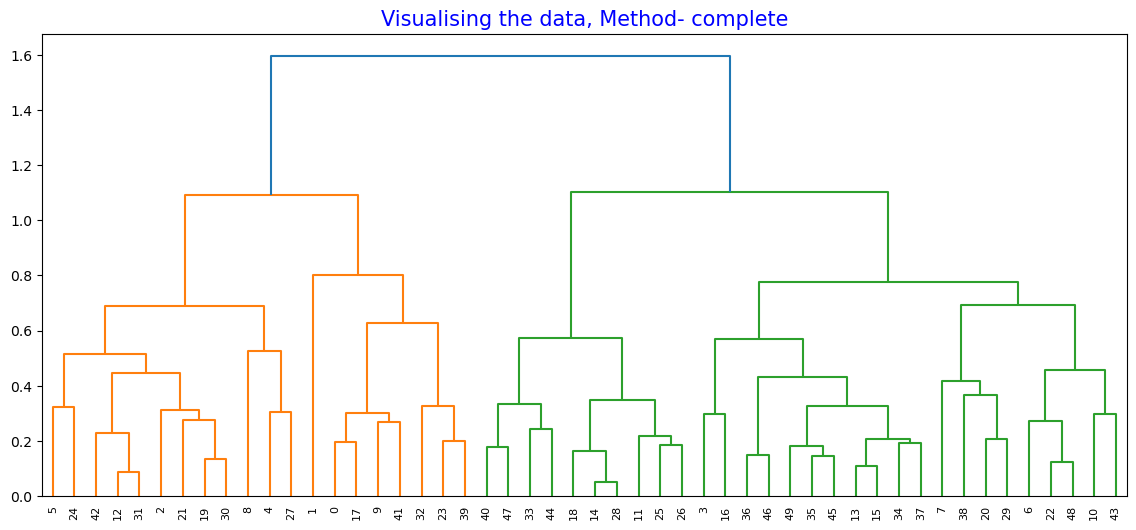

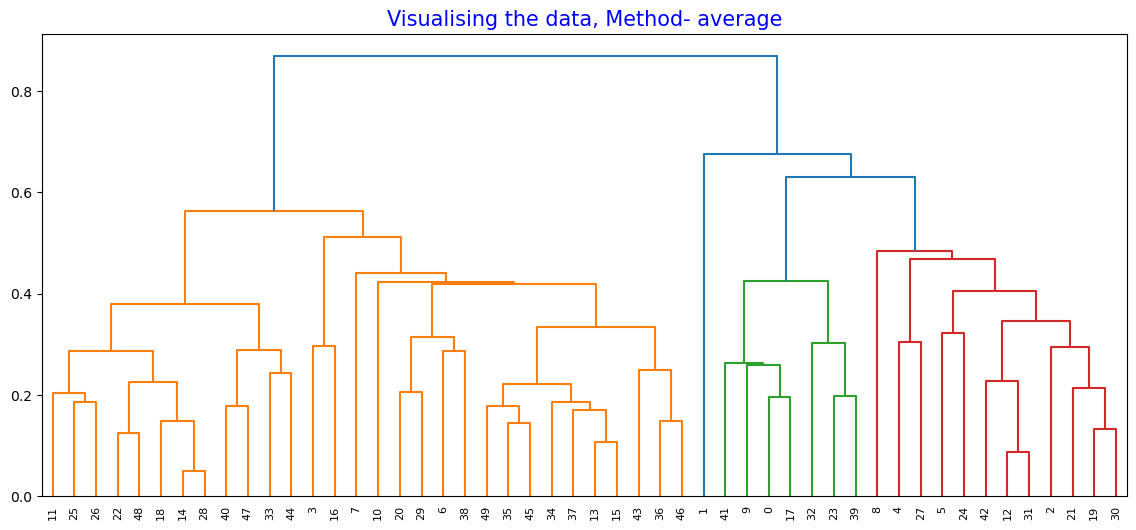

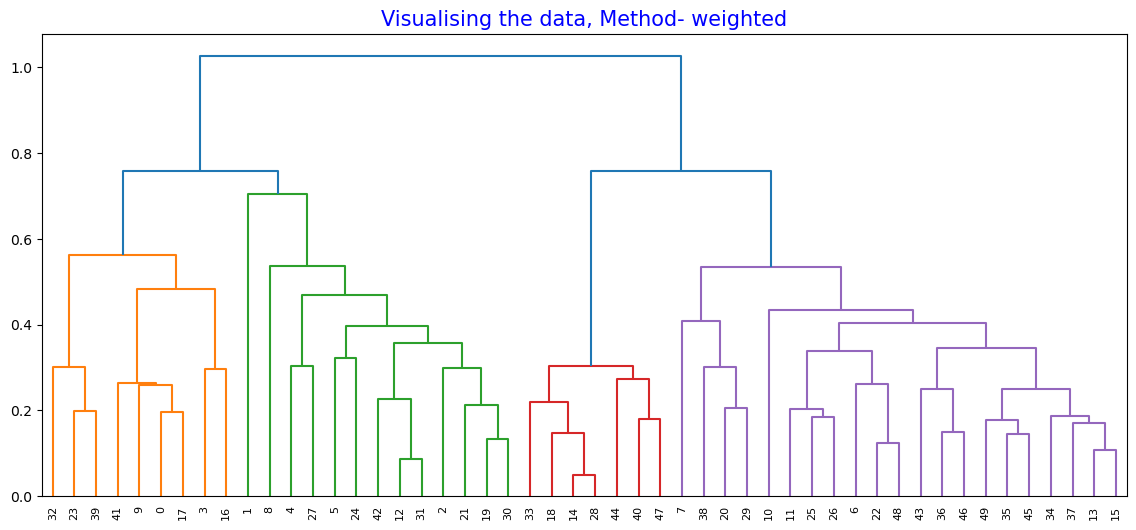

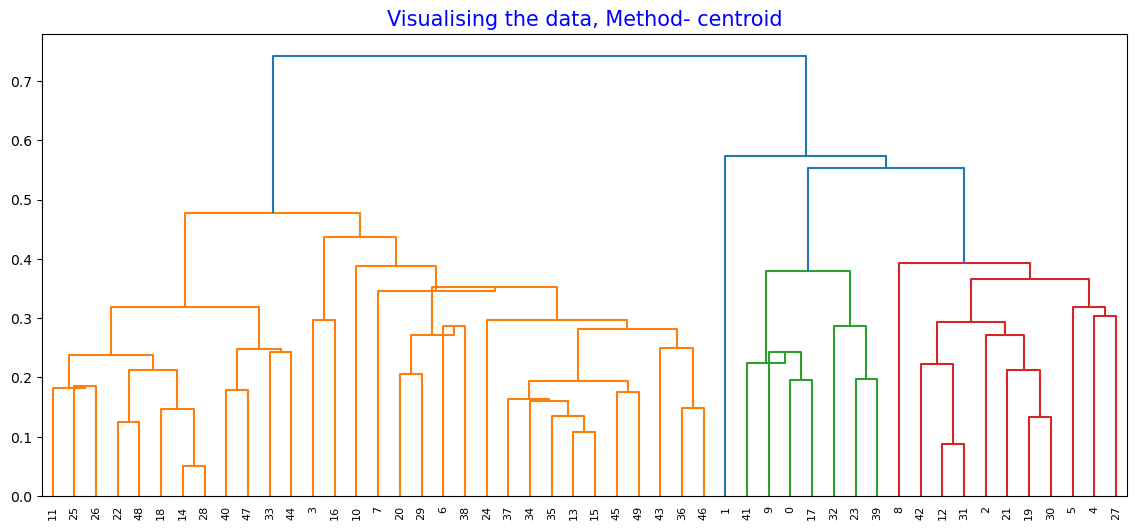

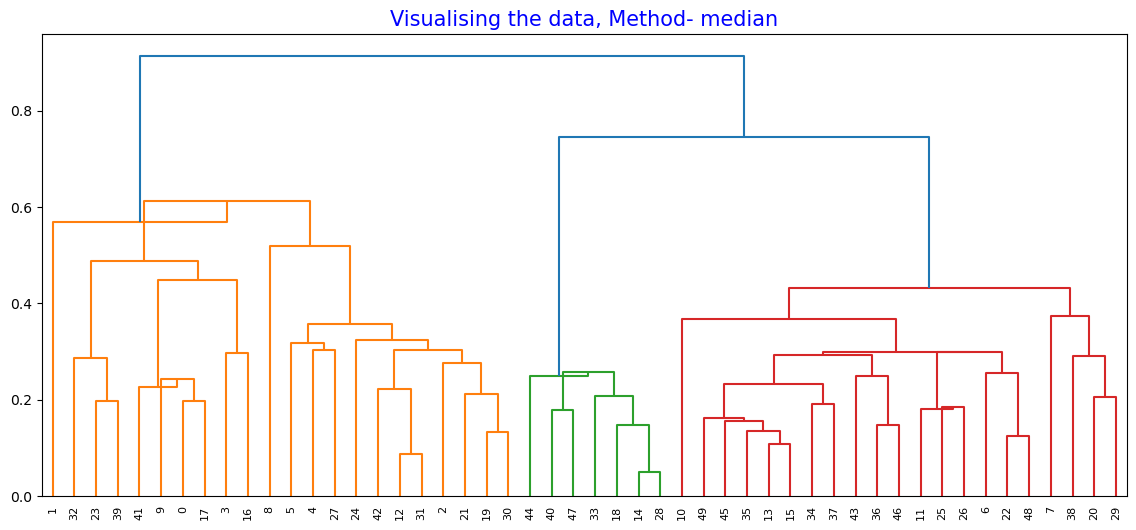

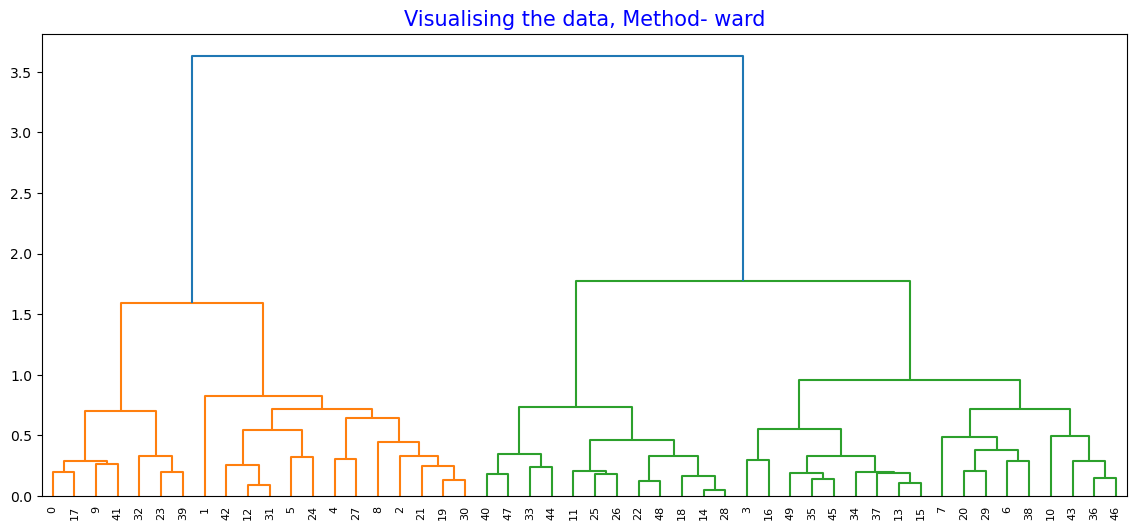

In [247]:
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(14,6))     
    dict = {'fontsize':15,'fontweight' :10, 'color' : 'blue'}  
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(norm_crime, method = methods,optimal_ordering=False))
    

In [248]:
n_clusters = [2,3,4,5,6,7,8] 

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(norm_crime)
        silhouette_score1 = silhouette_score(norm_crime, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- average : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- single : 0.21033337025958487

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.31916915428121284
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.30877213909512063
For n_clusters = 3 The average silhouette_score with linkage- average : 0.35149572430421583
For n_clusters = 3 The average silhouette_score with linkage- single : 0.14223288708185444

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3298707379986785
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.3060729442426308
For n_clusters = 4 The average silhouette_score with linkage- average : 0.36992391140277

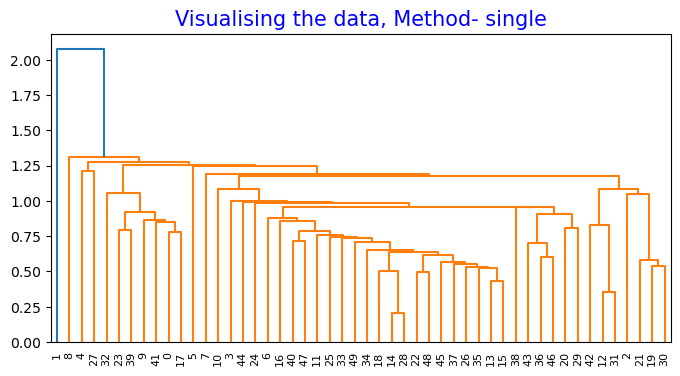

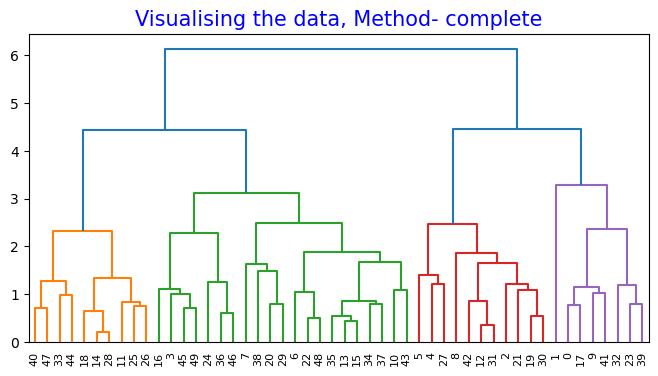

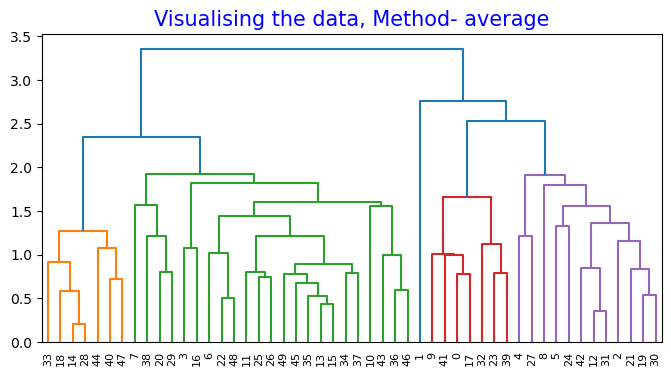

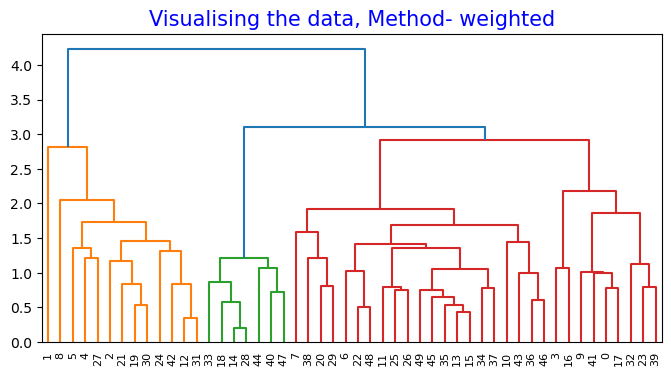

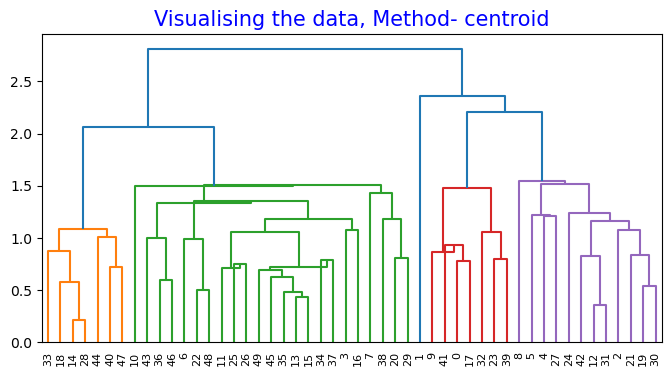

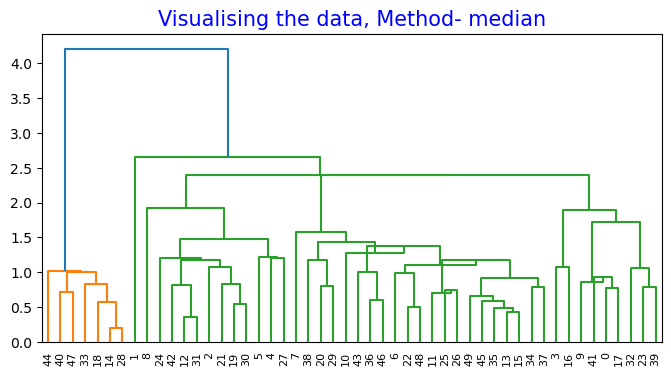

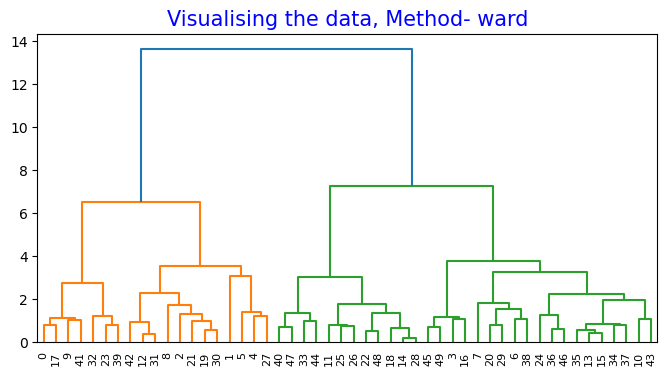

In [251]:
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(8,4))     
    dict = {'fontsize':15,'fontweight' :10, 'color' : 'blue'}  
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(std_crime, method = methods,optimal_ordering=False))

In [252]:
n_clusters = [2,3,4,5,6,7,8] 

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster2 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages)
        hie_labels2 = hie_cluster2.fit_predict(std_crime)
        silhouette_score2 = silhouette_score(std_crime, hie_labels2)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score2)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4084890326217641
For n_clusters = 2 The average silhouette_score with linkage- single : 0.23455598753159795

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.31036358174027895
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.36924314190439733
For n_clusters = 3 The average silhouette_score with linkage- average : 0.34863679190476177
For n_clusters = 3 The average silhouette_score with linkage- single : 0.14582343625170263

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3370187183556962
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.31595507426164543
For n_clusters = 4 The average silhouette_score with linkage- average : 0.3636819420151221

In [253]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')

In [254]:
y_pred_hie = agg_clustering.fit_predict(norm_crime)

In [255]:
print(y_pred_hie.shape)

(50,)


In [256]:
y_pred_hie

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [257]:
agg_clustering.n_clusters_

2

In [258]:
(silhouette_score(norm_crime, agg_clustering.labels_)*100).round(3)

42.364

In [259]:
crime_df['Hierarchical_Labels'] = agg_clustering.labels_

In [260]:
crime_df.groupby('Hierarchical_Labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Kmeans_Label
,mean,mean,mean,mean,mean
Hierarchical_Labels,,,,,
0,4.870,114.433333,63.633333,15.943333,0.0
1,12.165,255.250000,68.400000,29.165000,1.0


### DBSCAN 

In [261]:
from itertools import product

In [262]:
eps_values = np.arange(0.25,2,0.25)
min_samples = np.arange(1,3)
DBSCAN_params = list(product(eps_values, min_samples))

In [263]:
no_of_clusters = []
sil_score = []

In [264]:
for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_crime)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(std_crime, DBS_clustering.labels_))

A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.


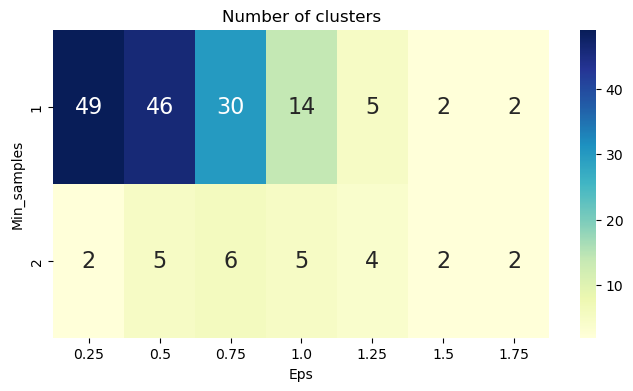

In [265]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

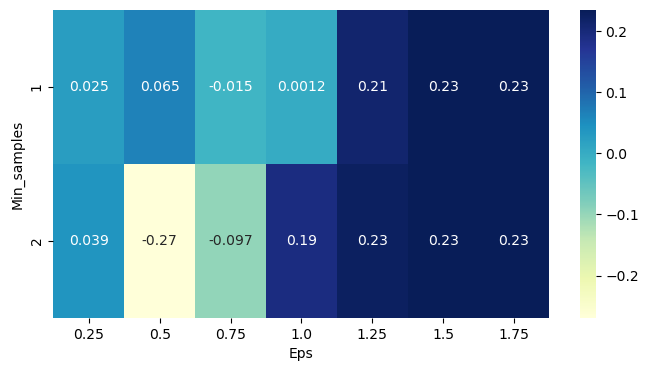

In [266]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [267]:
epsilon = [0.25,0.50,0.75,1,1.25,1.50,1.75,2]
min_samples = [1,2]

In [268]:
sil_avg = []
max_value = [0,0,0,0]

In [269]:
for i in range(len(epsilon)):
    for j in range(len(min_samples)):
        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_crime)
    
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

    
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        silhouette_avg = silhouette_score(std_crime, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 1.5 
min_sample= 1 
number of clusters= 2 
average silhouette score= 0.2346


In [270]:
dbscan = DBSCAN(eps=1.5, min_samples=1) # min_samples = number of columns  or len(dataset.columns)* 3
dbscan.fit(std_crime)

DBSCAN(eps=1.5, min_samples=1)

In [271]:
dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [272]:
dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [273]:
crime_df['DBSCAN_Labels'] = dbscan.labels_
crime_df.head()

,Murder,Assault,UrbanPop,Rape,Kmeans_Label,Hierarchical_Labels,DBSCAN_Labels
States,,,,,,,
Alabama,13.2,236,58,21.2,1,1,0
Alaska,10.0,263,48,44.5,1,1,1
Arizona,8.1,294,80,31.0,1,1,0
Arkansas,8.8,190,50,19.5,0,0,0
California,9.0,276,91,40.6,1,1,0


In [274]:
crime_df.groupby('DBSCAN_Labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Kmeans_Label,Hierarchical_Labels
,mean,mean,mean,mean,mean,mean
DBSCAN_Labels,,,,,,
0,7.742857,168.877551,65.897959,20.757143,0.387755,0.387755
1,10.000000,263.000000,48.000000,44.500000,1.000000,1.000000


In [275]:
print("Silhouette Coefficient: %0.3f" % silhouette_score(std_crime, dbscan.labels_))

Silhouette Coefficient: 0.235


In [276]:
eps_values = np.arange(0.25,0.75,0.25) 
min_samples = np.arange(1,3)
DBSCAN_params = list(product(eps_values, min_samples))

In [277]:
no_of_clusters = []
sil_score = []

In [278]:
for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(norm_crime)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(norm_crime, DBS_clustering.labels_))

A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.


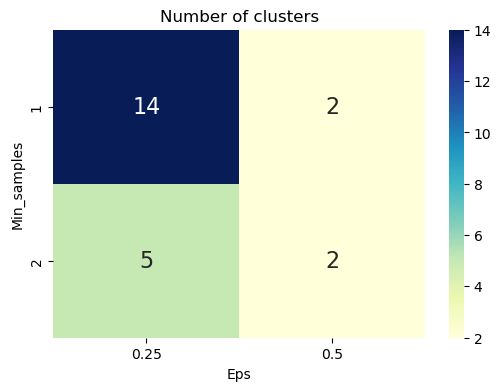

In [279]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

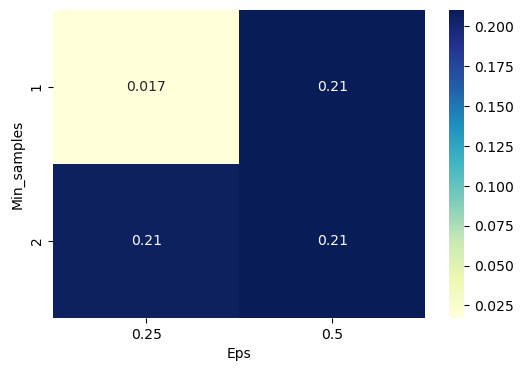

In [280]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [281]:
epsilon = [0.25,0.5]
min_samples = [1,2]
sil_avg = []
max_value = [0,0,0,0]


In [282]:
for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(norm_crime)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        silhouette_avg = silhouette_score(norm_crime, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.5 
min_sample= 1 
number of clusters= 2 
average silhouette score= 0.2103


In [283]:
dbscan = DBSCAN(eps=0.5, min_samples=1) # min_samples = number of clumns * 3
dbscan.fit(norm_crime)

DBSCAN(min_samples=1)

In [284]:
dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [285]:
crime_df['DBSCAN_Labels'] = dbscan.labels_
crime_df.head()

,Murder,Assault,UrbanPop,Rape,Kmeans_Label,Hierarchical_Labels,DBSCAN_Labels
States,,,,,,,
Alabama,13.2,236,58,21.2,1,1,0
Alaska,10.0,263,48,44.5,1,1,1
Arizona,8.1,294,80,31.0,1,1,0
Arkansas,8.8,190,50,19.5,0,0,0
California,9.0,276,91,40.6,1,1,0


In [286]:
crime_df.groupby('DBSCAN_Labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Kmeans_Label,Hierarchical_Labels
,mean,mean,mean,mean,mean,mean
DBSCAN_Labels,,,,,,
0,7.742857,168.877551,65.897959,20.757143,0.387755,0.387755
1,10.000000,263.000000,48.000000,44.500000,1.000000,1.000000


In [287]:
cluster1 = pd.DataFrame(crime_df.loc[crime_df.DBSCAN_Labels==0].mean(),columns= ['Cluster1_Avg'])
cluster2 = pd.DataFrame(crime_df.loc[crime_df.DBSCAN_Labels==1].mean(),columns= ['Cluster2_Avg'])
avg_crime = pd.concat([cluster1,cluster2],axis=1)
avg_crime

,Cluster1_Avg,Cluster2_Avg
Murder,7.742857,10.0
Assault,168.877551,263.0
UrbanPop,65.897959,48.0
Rape,20.757143,44.5
Kmeans_Label,0.387755,1.0
Hierarchical_Labels,0.387755,1.0
DBSCAN_Labels,0.000000,1.0
